# File to explore time dependant data and create (preliminary plots)

## Create run scripts and test data

- Extract snapshot times-function is in archive-folders

- Some boxes on creating spherically symmetric distribution outside the box.
  These can be modidified to be dependent on snapshot-specific data, ie
  gas-to-dust-ratio and average dust density at 14-15au.

In [2]:
# Create run-files
import create_r3d_functions as c3d

outpaths = [
    #'../r3dsims/st28gm06n052/',
    '../r3dsims/st28gm06n074/',
    '../r3dsims/st28gm06n075/',
]
phaseslist = [
    #[phase for phase in range(396,400+1)],
    [phase for phase in range(230,235+1)],
    [phase for phase in range(222,232+1)],
]
for outpath,phases in zip(outpaths,phaseslist):
    c3d.write_r3d_runscripts(
        path = outpath,
        phase_list = phases,
        sed_angles_list = [
            [0,0],
            [90,0],
            [180,0],
            [270,0],
            [90,90],
            [90,270],
        ],
        image_wavelength_list = [1,2,10],
        image_angles_list = [
            [0,0],
            [90,0],
            [180,0],
            [270,0],
            [90,90],
            [90,270],
        ],
        image_sizeau = 30,
        image_npix = 512,
        Nscripts = 1
    )


Finished writing 6 run-r3d-scripts

Finished writing 11 run-r3d-scripts



In [23]:
# Extract dust masses from r3d-log output

#modelname = 'st28gm06n052'
#phases = [
#    phase for phase in range(256,265+1)
#]
phases = [256]
# Loop through phases
for phase in phases:
    totalmass = 0
    # Load beginning of log-file
    with open(f'r3dout_{phase}_1.txt', 'r') as flog:
        # Loop through beginning of log file, dust mass always starts at
        # line 38
        for nline,line in enumerate(flog.readlines()):
            if nline >= 38 and nline <= 50:
                # Extract lines with dust masses
                if line.split()[:4] == ['Dust', 'mass', 'in', 'species']:
                    # Dust mass is 6th element of split

                    masses = float(line.split()[6])

                    totalmass += masses

            if nline > 50:
                break
    # Output total mass and phase number
    print(f'    {phase}      {totalmass}')


    256      1.2982539038591769e-08


In [1]:
# Create spherical dust density distribution outside the co5bold-box
# very approximative, just to test effect on SED by using results from
# inner box SED as emitting point source star
import create_r3d_functions as c3d
import os

AUcm = 1.49598e13 # cm
inradius = 15
outradius=1000
outputpath='../r3dresults/st28gm06n052_largesphere/'

# Create grid
c3d.create_grid(
    gridedge=outradius, 
    nxyz=10, 
    refinementlist=[800,600,400,200], 
    inrefine=14, 
    savegrid=True
)
os.system(f'mv ../amr_grid.inp {outputpath}')
os.system(f'mv ../grid_distances.csv {outputpath}')
os.system(f'mv ../grid_cellsizes.csv {outputpath}')
os.system(f'mv ../grid_info.txt {outputpath}')




Creating amr_grid with octree refinement.
  Final length of total side of whole grid: 1000 AU
  Number of base cells along one side of the grid: 10
  Distances to outer refinement limits from centrum:
    [800, 600, 400, 200] AU
  Distances to inner refinement limits from centrum:
    [3.5, 7.0, 10.5, 14.0] AU
  Number refinements: 4

  Size of base cell: 100.0 AU
  Child cell size 1: 50.0 AU
  Child cell size 2: 25.0 AU
  Child cell size 3: 12.5 AU
  Child cell size 4: 6.25 AU
  Writing amr_grid.inp
  Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/postprocessing of your model. They have the same order as dust_densities.inp)
  Writing grid_info.txt
Create grid:
    amr_grid.inp
    grid_info.txt
    grid_distances.csv
    grid_cellsizes.csv
DONE



0

In [1]:
# Create spherical dust density distribution outside the co5bold-box
# very approximative, just to test effect on SED by using results from
# inner box SED as emitting point source star
# Create density

import create_r3d_functions as c3d
import os

AUcm = 1.49598e13 # cm
inradius = 15
outradius=1000
outputpath='../r3dresults/st28gm06n052_largesphere/'

c3d.create_spheredensity(
    optconstlist=['mg2sio4'],
    agrainlist=[0.95],
    totaldustmass=2.5e-6*1.989e33,
    densitypower=-2,
    inradius=inradius,
    outradius=outradius,
    outputpath=outputpath
)


Running create_spheredensity():
  Loading grid distances
  Loading grid cell sizes
  Writing dust_density.inp
  Finished dust_density.inp, moved to outputpath
  Total dust mass is 3.663759664314922e+27 g (1.8420108920638119e-06 Msol)
create_spheredensity: Done


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:1096: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


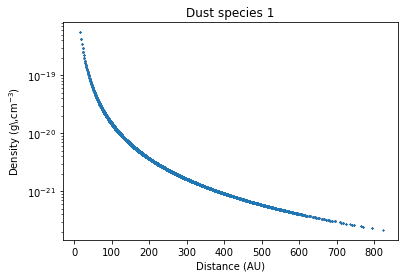

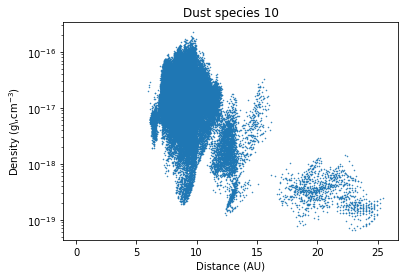

In [1]:
# plot to check densities
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

outputpath='../r3dresults/st28gm06n052_largesphere/'

a3d.plot_onedensity_radius(
    density_path=outputpath+'dust_density.inp',
    grid_path=outputpath+'grid_distances.csv',
    amr_path=outputpath+'amr_grid.inp',
    numb_specie=1
)
plt.yscale('log')


# Plot to compare numbers with inner densities
# Only plot last (largest grain size) species
a3d.plot_onedensity_radius(
    density_path=outputpath+'innerdata/dust_density_dust.inp',
    grid_path=outputpath+'innerdata/grid_distances.csv',
    amr_path=outputpath+'innerdata/amr_grid.inp',
    numb_specie=10
)
plt.yscale('log')


In [3]:
# Extract spectrum adn write stars.inp
import analyze_r3d_functions as a3d

#model = '199_i090_phi270'
model = '225_i090_phi090'

wavelengths, spectrum = a3d.load_spectrum(
    path=f'../r3dresults/st28gm06n052_largesphere/{model}/spectrum_i090_phi090.out'
)
with open(f'../r3dresults/st28gm06n052_largesphere/{model}/stars_fix.inp', 'w') as f:
    for wavelength in wavelengths:
        f.write(f'{wavelength}\n')
    for flux in spectrum:
        f.write(f'{flux/1e23}\n')

# and write wavelength-file
with open(f'../r3dresults/st28gm06n052_largesphere/{model}/wavelength_micron.inp', 'w') as fwave:
    fwave.write(f'{int(len(wavelengths))}\n')
    for wavelength in wavelengths:
        fwave.write(f'{wavelength}\n')





## Remove spikes in SEDs and images

Doing folder: ../r3dresults/st28gm06n074
Doing folder: ../r3dresults/st28gm06n075


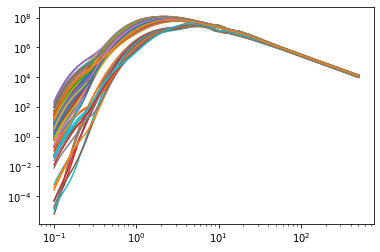

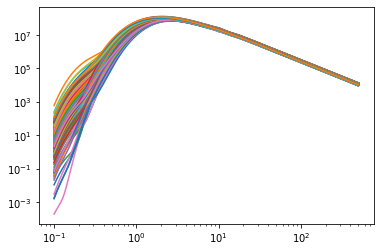

In [1]:
# Remove spikes from SED
# Merge SEDs with different seeds
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import os

folders = [
    #'../r3dresults/st28gm06n052_timedep',
    '../r3dresults/st28gm06n074',
    '../r3dresults/st28gm06n075',
]
phaseslist = [
    #[phase for phase in range(395,400+1)],
    [phase for phase in range(230,246+1)],
    [phase for phase in range(222,253+1)],
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
for folder,phases in zip(folders,phaseslist):
    print(f'Doing folder: {folder}')
    for phase in phases:
        for angle in angles:
            a,b = a3d.remove_sedspikes(
                paths = [
                            f'{folder}_1/{phase}/spectrum_{angle}.out',
                            f'{folder}_2/{phase}/spectrum_{angle}.out',
                            f'{folder}_3/{phase}/spectrum_{angle}.out',
                        ],
                save=True
            )
            if os.path.exists(f'{folder}_nospikes/{phase}') == False:
                os.system(f'mkdir {folder}_nospikes/{phase}')
            os.system(f'mv ../spectrum.out {folder}_nospikes/{phase}/spectrum_{angle}.out')

            plt.figure(num=folder)
            plt.plot(a,b)
            plt.xscale('log')
            plt.yscale('log')



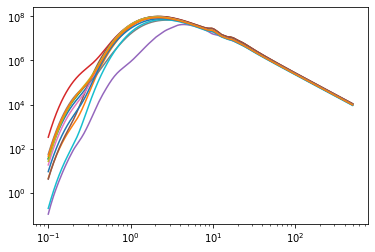

In [2]:
# Extra remove spikes from SED, for those who need an extra seed
# Merge SEDs with different seeds
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import os

#folder = '../r3dresults/st28gm06n052_timedep'
folder = '../r3dresults/st28gm06n074'
#folder = '../r3dresults/st28gm06n075'

phases = [
    269,
    438
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
for phase in phases:
    for angle in angles:
        a,b = a3d.remove_sedspikes(
                paths = [
                            f'{folder}_1/{phase}/spectrum_{angle}.out',
                            f'{folder}_2/{phase}/spectrum_{angle}.out',
                            f'{folder}_3/{phase}/spectrum_{angle}.out',
                            f'{folder}_4/{phase}/spectrum_{angle}.out',
                        ],
                save=True
            )
        if os.path.exists(f'{folder}_nospikes/{phase}') == False:
            os.system(f'mkdir {folder}_nospikes/{phase}')
        os.system(f'mv ../spectrum.out {folder}_nospikes/{phase}/spectrum_{angle}.out')

        plt.plot(a,b)
        plt.xscale('log')
        plt.yscale('log')
plt.show()


In [ ]:
# Remove spikes from Images
import analyze_r3d_functions as a3d
import os

folders = [
    '../r3dresults/st28gm06n052_timedep',
    '../r3dresults/st28gm06n052_timedep',
    '../r3dresults/st28gm06n052_timedep',
    '../r3dresults/st28gm06n052_timedep',
    '../r3dresults/st28gm06n074',
    '../r3dresults/st28gm06n074',
    '../r3dresults/st28gm06n074',
    '../r3dresults/st28gm06n075',
]
phaseslist = [
    [phase for phase in range(180,259+1)],
    [261,262],
    [phase for phase in range(264,363+1)],
    [phase for phase in range(365,400+1)],
    [phase for phase in range(230,268+1)],
    [phase for phase in range(270,437+1)],
    [phase for phase in range(439,450+1)],
    [phase for phase in range(222,442+1)],
]
images = [
    'image_i000_phi000_01um.out',
    'image_i000_phi000_02um.out',
    'image_i000_phi000_10um.out',
    'image_i090_phi000_01um.out',
    'image_i090_phi000_02um.out',
    'image_i090_phi000_10um.out',
    'image_i090_phi090_01um.out',
    'image_i090_phi090_02um.out',
    'image_i090_phi090_10um.out',
    'image_i090_phi270_01um.out',
    'image_i090_phi270_02um.out',
    'image_i090_phi270_10um.out',
    'image_i180_phi000_01um.out',
    'image_i180_phi000_02um.out',
    'image_i180_phi000_10um.out',
    'image_i270_phi000_01um.out',
    'image_i270_phi000_02um.out',
    'image_i270_phi000_10um.out'
]
for folder,phases in zip(folders,phaseslist):
    print(f'Doing folder: {folder}')
    for phase in phases:
        print(f'  Doing phase {phase}')
        for image in images:

            image1d = a3d.remove_imagespikes(
                folders = [
                    f'{folder}_1/{phase}/',
                    f'{folder}_2/{phase}/',
                    f'{folder}_3/{phase}/',
                    #f'{folder}_4/{phase}/',
                ],
                imagefilename = image
            )
            if os.path.exists(f'{folder}_nospikes/{phase}') == False:
                os.system(f'mkdir {folder}_nospikes/{phase}')
            os.system(f'mv ../{image} {folder}_nospikes/{phase}/')


Doing folder: ../r3dresults/st28gm06n052_timedep
  Doing phase 180
  Doing phase 181
  Doing phase 182
  Doing phase 183
  Doing phase 184
  Doing phase 185
  Doing phase 186
  Doing phase 187
  Doing phase 188
  Doing phase 189
  Doing phase 190
  Doing phase 191
  Doing phase 192
  Doing phase 193
  Doing phase 194
  Doing phase 195
  Doing phase 196
  Doing phase 197
  Doing phase 198
  Doing phase 199
  Doing phase 200
  Doing phase 201
  Doing phase 202
  Doing phase 203
  Doing phase 204
  Doing phase 205
  Doing phase 206
  Doing phase 207
  Doing phase 208
  Doing phase 209
  Doing phase 210
  Doing phase 211
  Doing phase 212
  Doing phase 213
  Doing phase 214
  Doing phase 215
  Doing phase 216
  Doing phase 217
  Doing phase 218
  Doing phase 219
  Doing phase 220
  Doing phase 221
  Doing phase 222
  Doing phase 223
  Doing phase 224
  Doing phase 225
  Doing phase 226
  Doing phase 227
  Doing phase 228
  Doing phase 229
  Doing phase 230
  Doing phase 231
  Doing phase 2

In [5]:
# SPECIAL: for 075, snapshots 255, 259 and 345, interpolate images and SEDs
# between previous and next snapshots
import analyze_r3d_functions as a3d

# Define stuff
modelname = 'st28gm06n075'
phases = [
    255,
    259,
    345
]
imagewaves = [
    '01','02','10'
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Loop through each phase and interpolate images and SEDs
for phase in phases:
    prev_phase = phase-1
    next_phase = phase+1
    # Loop through angles
    for angle in angles:
        # Load SEDs
        wavelengths, prev_sed = a3d.load_spectrum(
            path=f'../r3dresults/{modelname}_nospikes/{prev_phase}/spectrum_{angle}.out'
        )
        wavelengths, next_sed = a3d.load_spectrum(
            path=f'../r3dresults/{modelname}_nospikes/{next_phase}/spectrum_{angle}.out'
        )
        #
        # Wave average flux density in new files
        with open(f'../r3dresults/{modelname}_nospikes/{phase}/spectrum_{angle}.out', 'w') as fsed:
            # Write header
            fsed.write(
                f'           1\n        {int(len(wavelengths))}\n\n'
            )
            # Write wavelength and flux densities, changed back to r3d-fluxformat
            for nwavelength,wavelength in enumerate(wavelengths):
                fsed.write(f'  {wavelength}   {0.5*(prev_sed[nwavelength]+next_sed[nwavelength])/1e23}\n')
        #
        #
        # And load images
        for imagewave in imagewaves:
            #
            # Reset lists
            imageheader = []
            prev_image = []
            next_image = []
            #
            with open(f'../r3dresults/{modelname}_nospikes/{prev_phase}/image_{angle}_{imagewave}um.out', 'r') as fprev_image:
                for nline,line in enumerate(fprev_image.readlines()):
                    # First save header
                    if nline < 6:
                        imageheader.append(line)
                    if nline >= 6:
                    # Then prev flux densities
                        prev_image.append(float(line))
            #
            # And next image flux densities
            with open(f'../r3dresults/{modelname}_nospikes/{next_phase}/image_{angle}_{imagewave}um.out', 'r') as fnext_image:
                for nline,line in enumerate(fnext_image.readlines()):
                    if nline >= 6:
                        next_image.append(float(line))
            #
            # And save number of pixels
            Npixels = len(next_image)
            #
            # Write new image-files
            with open(f'../r3dresults/{modelname}_nospikes/{phase}/image_{angle}_{imagewave}um.out', 'w') as fimage:
                #
                # Write header
                for line in imageheader:
                    fimage.write(f'{line}')
                #
                # Write image fluxes
                for npixel in range(Npixels):
                    fimage.write(f'{0.5*(prev_image[npixel]+next_image[npixel])}\n')






## Plot Images

In [3]:
%%capture
# plot time-series images in one direction, one wavelength
# saves pngs in folder r3dplots, timestamped to today

import os
import numpy as np
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from datetime import date



path = '../r3dresults/st28gm06n052_timedep_nospikes/'
modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'

wavelength = '10'
imagefilename = f'image_i000_phi000_{wavelength}um.out'

# Create outputfolder
outputfolder = f'../r3dplots/{str(date.today())}_{modelabbreviation}_image-1dir-{wavelength}um/'
if os.path.exists(outputfolder) == False:
    os.system(f'mkdir {outputfolder}')

# Extract list of folders from the path folder, and make them to numbers, and sort them!
snapshot_folders = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
snapshot_folders.sort()

# Load snapshot times ([:,1] is years, [:,0] is snapshot number)
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')


# Load one image at a time and save as png's for animationcreations
for snapshot in snapshot_folders:

    # Create plot objects with image
    fig, ax, fluxtotal = a3d.plot_images(
        path = f'{path}/{snapshot}/',
        images = [imagefilename]
    )
    for snaptime in snapshot_times:
        if snapshot == snaptime[0]:
            ax.text(
                x=16,y=14,
                s=f'{snaptime[1]:.3f} yrs',
                backgroundcolor='white',
                fontsize=15
            )




    # Save as PNG's
    fig.tight_layout()
    fig.savefig(f'{outputfolder}{snapshot}_{imagefilename[:-4]}.png', facecolor='white')



In [6]:
%%capture
# plot time-series images in all directions
# ie 6 subplots in same fig
# capture stops image output
import os
import numpy as np
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from datetime import date


# Set some path settings
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
path = '../r3dresults/st28gm06n075_nospikes/'
modelabbreviation = '075'

#path = '../r3dresults/st28gm06n052_timedep_nodust/'
#modelabbreviation = '052nodust'



# Extract list of folders from the path folder, and make them to numbers, and sort them!
snapshot_folders = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
snapshot_folders.sort()
# Or chose manually:
#snapshot_folders = [nphase for nphase in range(296,325+1)]

# Chose wavelength
#wavelength = '01'
#wavelength = '02'
wavelength = '10'

# Resulting list of image files
imagefilenames = [
    f'image_i000_phi000_{wavelength}um.out',
    f'image_i090_phi000_{wavelength}um.out',
    f'image_i090_phi090_{wavelength}um.out',
    f'image_i090_phi270_{wavelength}um.out',
    f'image_i180_phi000_{wavelength}um.out',
    f'image_i270_phi000_{wavelength}um.out'
]
# Create outputfolder
outputfolder = f'../r3dplots/{str(date.today())}_{modelabbreviation}_image-6direct-{wavelength}um/'
if os.path.exists(outputfolder) == False:
    os.system(f'mkdir {outputfolder}')


# Load snapshot times ([:,1] is years, [:,0] is snapshot number)
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')

# Load all 6 LOSs at a time and save as png's for animation creation
for snapshot in snapshot_folders:
    # Create list with image paths
    imagepaths = []
    for imagefilename in imagefilenames:
        imagepaths.append(f'{path}{snapshot}/{imagefilename}')

    # Create plot objects with image
    fig, ax = a3d.plot_imagesubplots(
        imagelist = imagepaths
    )
    for snaptime in snapshot_times:
        if snapshot == snaptime[0]:
            ax[0][-1].text(
                x=0,y=18,
                s=f'{snaptime[1]:.3f} yrs',
                backgroundcolor='white',
                fontsize=15
            )

    # Save as PNG's
    fig.tight_layout()
    fig.savefig(f'{outputfolder}{snapshot}_{wavelength}um.png', facecolor='white')

os.system('spd-say moo')



## Plot SEDs

In [3]:
%%capture
# Plot all SEDs in the same figure, highlight one snapshot
# Save SEDs as pngs in todaysdate-'_seds/'
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
from matplotlib import rc

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Set path settings
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
path = '../r3dresults/st28gm06n075_nospikes/'
modelabbreviation = '075'

# Create outputfolder
outputfolder = f'../r3dplots/{str(date.today())}_{modelabbreviation}_seds/'
if os.path.exists(outputfolder) == False:
    os.system(f'mkdir {outputfolder}')

# Extract list of folders from the path folder, and make them to numbers, and sort them!
#phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
#phases.sort()
phases=[nphase for nphase in range(413,443)]
    
# Load phase times
phasetimes = np.loadtxt(
    path+'snapshot_yr.dat'
)[:,1]
# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Load min-max SEDs
average_SED = np.loadtxt(path+'average_sed.dat')
wavelength = average_SED[:,0]
maxSED = average_SED[:,3]
minSED = average_SED[:,4]
# Set plot colours
if modelabbreviation == '052':
    linecolour = 'darkblue'
    allcolour = 'deepskyblue'
if modelabbreviation == '074':
    linecolour = 'darkred'
    allcolour = 'salmon' #lr tomato
if modelabbreviation == '075':
    linecolour = 'darkgreen'
    allcolour = 'lawngreen'




# Loop over high lighted snapshots
for nsnap,hilitsnapshot in enumerate(phases):
    
    # Set settings for each highlighted snapshotplot
    fig, ax = plt.figure(
        hilitsnapshot, 
        figsize=(6, 4)
    ), plt.axes()
    ax.set(
        xscale='log',
        yscale='log',
        xlim=[0.5,40],
        ylim=[1e5,2e8]
    )
    ax.set_ylabel(r'$F_\nu$, Jy at 1 pc', fontsize=18)
    ax.set_xlabel(r'Wavelength ($\mu$m)',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Plot min-max range of all SEDs
    ax.fill_between(
        wavelength,
        minSED,
        maxSED,
        color=allcolour
    )
    # Load and plot hilite-snapshot
    for angle in angles:
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{path}{hilitsnapshot}/spectrum_{angle}.out'
        )
        ax.plot(
            wavelength,
            fluxes,
            color=linecolour
        )
    # Add textbox with snapshot numer
    ax.text(
        x=15,y=8e7,
        s=f'{phasetimes[nsnap]:.3f} yrs',
        backgroundcolor='white',
        fontsize=15
    )
    # Save each in a separate file, for talks and suchs
    fig.tight_layout()
    fig.savefig(
        f'../r3dplots/{outputfolder}/seds_{hilitsnapshot}.png', 
        dpi=300, 
        facecolor='white'
    )

os.system('spd-say moo')







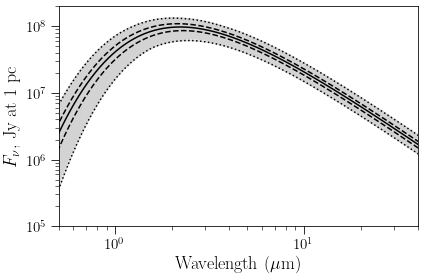

In [6]:
import analyze_timedep_functions as atf
from matplotlib import rc
import os

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Path settings
# With dust
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
#path = '../r3dresults/st28gm06n075_nospikes/'
#modelabbreviation = '075'

# Without dust
path = '../r3dresults/st28gm06n052_timedep_nodust/'
modelabbreviation = '052_nodust'
#path = '../r3dresults/st28gm06n074_nodust/'
#modelabbreviation = '074_nodust'
#path = '../r3dresults/st28gm06n075_nodust/'
#modelabbreviation = '075_nodust'

# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()

fig,ax = atf.plot_allseds(
    path=path,
    phases=phases,
)
# Save figure
#fig.tight_layout()
#fig.savefig(
#    f'/home/joachim/exwings/r3dplots/{modelabbreviation}_allSEDs_averagestdminmax.pdf',
#    facecolor='white',
#    dpi=300
#)



In [1]:
# Extract and save average, std, and minmax-SEDs
import analyze_timedep_functions as atf
import os

# Path settings
# With or without dust?
withdust = 'n'

if withdust == 'y':
    paths = [
        '../r3dresults/st28gm06n052_timedep_nospikes/',
        '../r3dresults/st28gm06n074_nospikes/',
        '../r3dresults/st28gm06n075_nospikes/'
    ]
else:
    paths = [
        '../r3dresults/st28gm06n052_timedep_nodust/',
        '../r3dresults/st28gm06n074_nodust/',
        '../r3dresults/st28gm06n075_nodust/'
    ]

for path in paths:
    # Extract list of folders from the path folder, and make them to numbers, and sort them!
    phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
    phases.sort()

    print(f'  Doing {path}')

    # Extract and save dat file with average etc
    atf.extract_averageseds(
        path=path,
        phases=phases,
        save_datafile='y',
    )




  Doing ../r3dresults/st28gm06n052_timedep_nodust/
  Doing ../r3dresults/st28gm06n074_nodust/
  Doing ../r3dresults/st28gm06n075_nodust/


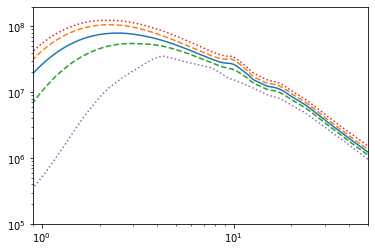

In [18]:
# Testplot data from average SED file
import matplotlib.pyplot as plt
import numpy as np

seds = np.loadtxt('../r3dresults/st28gm06n074_nospikes/average_sed.dat')

plt.xscale('log')
plt.yscale('log')

plt.xlim([0.9,50])
plt.ylim([1e5,2e8])

plt.plot(seds[:,0],seds[:,1])

plt.plot(seds[:,0],seds[:,1]+seds[:,2],'--')
plt.plot(seds[:,0],seds[:,1]-seds[:,2],'--')

plt.plot(seds[:,0],seds[:,3],':')
plt.plot(seds[:,0],seds[:,4],':')



## Plot various time-dep-plots

### Flambda(time)-plots

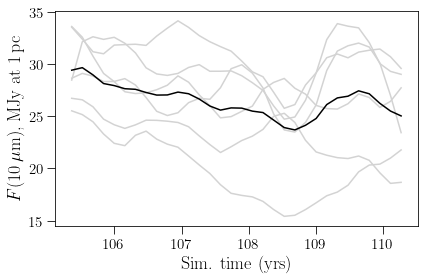

In [11]:
# Plot time-dependent plots
# 1. Plot Flambda(time)
import os
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
from matplotlib import rc

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Path to model of choise
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#model = '052'
path = '../r3dresults/st28gm06n074_nospikes/'
model = '074'


# Wavelength to plot
wavelength = 10

# Load all phases
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:Nphases,1]

# And angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Load wavelengthgrid and extract index for 10um
wavelengths,spectrum = a3d.load_spectrum(
    path = f'{path}{phases[0]}/spectrum_{angles[0]}.out'
)
wavelengths = np.array(wavelengths)
wavelengthindex = int(np.where(wavelengths >= wavelength)[0][0]-1)
fluxall = np.zeros((len(angles),Nphases))

# Set figure settings
fig, ax = plt.figure(num=f'F(t) of {wavelength} um', figsize=(6, 4)), plt.axes()
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$F(10\,\mu$m$)$, MJy at 1\,pc',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)



# Loop through all phases and extract all flux densities at 10um
for nangles,angle in enumerate(angles):
    for nphase,phase in enumerate(phases):

        wavelengths,spectrum = a3d.load_spectrum(
            path = f'{path}{phase}/spectrum_{angle}.out'
        )
        fluxall[nangles,nphase] = spectrum[wavelengthindex]*1e-6
    
    # Plot each angles time dependent F10 in MJy
    plt.plot(phasetimes,fluxall[nangles,:],'lightgrey')

# Save average of each angles flux density at each time
fluxaverage = []
for nphase in range(Nphases):
    fluxaverage.append(np.mean(fluxall[:,nphase]))

# and plot average flux density
ax.plot(phasetimes,fluxaverage,'k')

# and save figure
fig.tight_layout()
plt.savefig(f'../r3dplots/{model}_fluxtime_{wavelength}um.pdf', dpi=300)


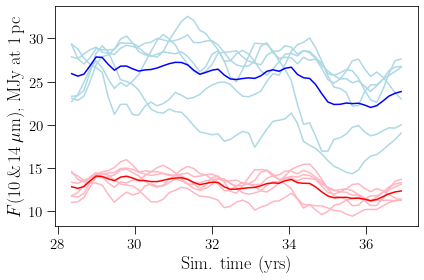

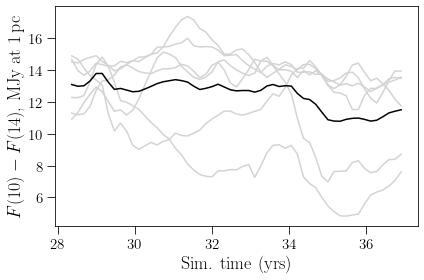

In [8]:
# Load F10 and F14 data of all SEDs and plot
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import os

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Path settings
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:Nphases,1]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Nangles = len(angles)

# Load wavelengthgrid and extract index for 10um
wavelengths,spectrum = a3d.load_spectrum(
    path = f'{path}{phases[0]}/spectrum_{angles[0]}.out'
)
wavelengths = np.array(wavelengths)
index10um = int(np.where(wavelengths >= 10)[0][0]-1)
index14um = int(np.where(wavelengths >= 14)[0][0]-1)

# Set up arrays to fill
f10all = np.zeros((Nangles,Nphases))
f14all = np.zeros((Nangles,Nphases))
f10average = np.zeros(Nphases)
f14average = np.zeros(Nphases)

# Initiate figures
fig1014, ax1014 = plt.figure(num='F10 and 14 stardust', figsize=(6, 4)), plt.axes()
fig10min14, ax10min14 = plt.figure(num='F10 - F14', figsize=(6, 4)), plt.axes()

# Loop over snapshots and angles
for nphase,phase in enumerate(phases):
    for nangle,angle in enumerate(angles):

        # Load all SEDs
        wavelength, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        # Save flux densities of 10 and 14 um
        f10all[nangle,nphase] = spectrum[index10um]*1e-6
        f14all[nangle,nphase] = spectrum[index14um]*1e-6
    
    # Take LOS averaged fluxes
    f10average[nphase] = np.mean(f10all[:,nphase])
    f14average[nphase] = np.mean(f14all[:,nphase])

# Plot each angle
for nangle,angle in enumerate(angles):
    ax1014.plot(phasetimes,f10all[nangle,:],'lightblue')
    ax1014.plot(phasetimes,f14all[nangle,:],'lightpink')
    ax10min14.plot(
        phasetimes,
        f10all[nangle,:] - f14all[nangle,:],
        'lightgrey'
    )

# Plot averages
ax1014.plot(phasetimes,f10average,'blue')
ax1014.plot(phasetimes,f14average,'red')
ax10min14.plot(
    phasetimes,
    f10average - f14average,
    'black'
)




ax1014.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax1014.set_ylabel(r'$F(10\,\&\,14\,\mu$m$)$, MJy at 1\,pc',fontsize=18);
ax1014.tick_params(axis='both', which='major', labelsize=15)
fig1014.tight_layout()

ax10min14.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax10min14.set_ylabel(r'$F(10) - F(14)$, MJy at 1\,pc',fontsize=18);
ax10min14.tick_params(axis='both', which='major', labelsize=15)
fig10min14.tight_layout()

# TODO SPARA!
#fig.savefig(
#    'figs/timedep_F10.pdf',
#    dpi=300,
#    facecolor='white'
#)


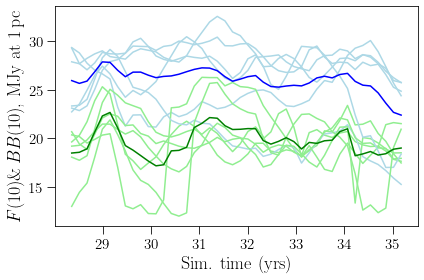

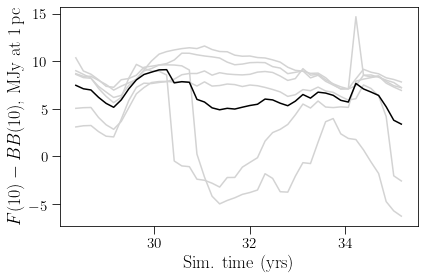

In [4]:
# Fit blackbodies to SEDs
# Extract 10um flux density of black bodies
# Take F10 - BBfit10 and plot
# Load F10 and F14 data of all SEDs and plot
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import os

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Path settings
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:Nphases,1]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Nangles = len(angles)

# Load wavelengthgrid and extract index for 10um
wavelengths,spectrum = a3d.load_spectrum(
    path = f'{path}{phases[0]}/spectrum_{angles[0]}.out'
)
wavelengths = np.array(wavelengths)
index10um = int(np.where(wavelengths >= 10)[0][0]-1)


# Set up arrays to fill
f10all = np.zeros((Nangles,Nphases))
f10average = np.zeros(Nphases)
BB10all = np.zeros((Nangles,Nphases))
BB10average = np.zeros(Nphases)




# Loop over snapshots and angles
for nphase,phase in enumerate(phases):
    for nangle,angle in enumerate(angles):

        # Load all SEDs
        wavelength, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        # Fit BB to SED
        N_maxflux = np.argmax(spectrum)
        BBfit = a3d.compute_blackbody_freq(
            peak_flux = np.max(spectrum),
            peak_wavelength = wavelength[N_maxflux],
            wavelengths = wavelength
        )
        # Save flux densities of 10 um
        f10all[nangle,nphase] = spectrum[index10um]*1e-6
        BB10all[nangle,nphase] = BBfit[index10um]*1e-6

    # Take LOS averaged fluxes
    f10average[nphase] = np.mean(f10all[:,nphase])
    BB10average[nphase] = np.mean(BB10all[:,nphase])


fig10, ax10 = plt.figure(num='F10stardust and BB10', figsize=(6, 4)), plt.axes()
figFminBB, axFminBB = plt.figure(num='F10stardust minus BB10', figsize=(6, 4)), plt.axes()


# Plot each angle
for nangle,angle in enumerate(angles):
    ax10.plot(phasetimes,f10all[nangle,:],'lightblue')
    ax10.plot(phasetimes,BB10all[nangle,:],'lightgreen')
    axFminBB.plot(
        phasetimes,
        f10all[nangle,:] - BB10all[nangle,:],
        'lightgrey'
    )

# Plot averages
ax10.plot(phasetimes,f10average,'blue')
ax10.plot(phasetimes,BB10average,'green')
axFminBB.plot(
    phasetimes,
    f10average - BB10average,
    'black'
)

ax10.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax10.set_ylabel(r'$F(10)\&\,BB(10)$, MJy at 1\,pc',fontsize=18);
ax10.tick_params(axis='both', which='major', labelsize=15)
fig10.tight_layout()


axFminBB.set_xlabel(r'Sim. time (yrs)',fontsize=18);
axFminBB.set_ylabel(r'$F(10) - BB(10)$, MJy at 1\,pc',fontsize=18);
axFminBB.tick_params(axis='both', which='major', labelsize=15)
figFminBB.tight_layout()







#### Plot major events

Total included time: 12.516780467011031
Angles      : Event time ratio     Periodicity


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:2796: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep


i000_phi000 : 0.0125  [0.52153252 1.25167805 0.41722602 0.78229878]
i090_phi000 : 0.075  [ 3.12919512  4.17226016 12.51678047  1.7881115 ]
i090_phi090 : 0.0625  [1.39075339 1.13788913 2.08613008 6.25839023]
i090_phi270 : 0.05  [1.7881115  6.25839023 1.39075339 2.50335609]
i180_phi000 : 0.0625  [12.51678047  0.78229878  0.7362812   1.7881115 ]
i270_phi000 : 0.0125  [-0.31291951  0.83445203  0.78229878  0.52153252]


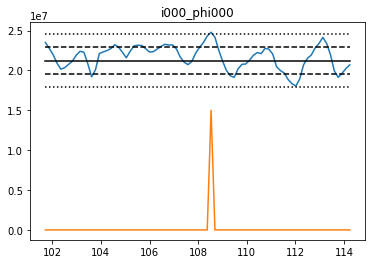

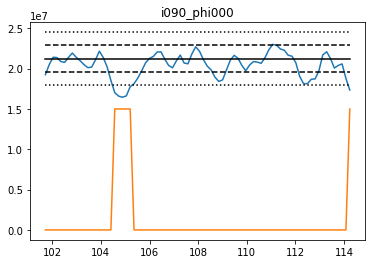

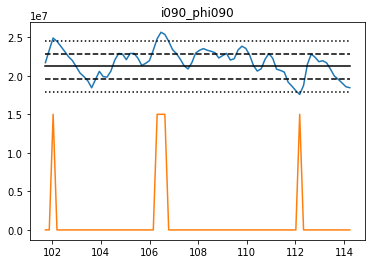

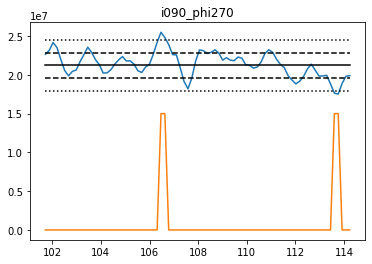

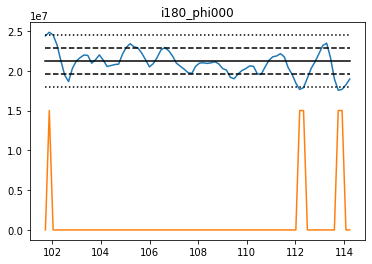

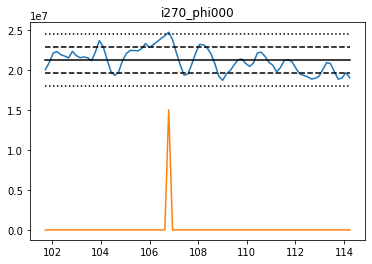

In [1]:
# Compute and plot Flux density-difference to mean SED
# Of dust EMISSION and/or ABSORPTION at 10um
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
import os

wavelength = 10
Nsigma = 2

# Set path settings
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
path = '../r3dresults/st28gm06n075_nospikes/'
modelabbreviation = '075'


# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
# And load corresponding time
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Load average SED-data
average_seds = np.loadtxt(f'{path}average_sed.dat')
wavelengths = average_seds[:,0]

# Extract index of chosen wavelength
n10micron = np.argwhere(wavelengths >= wavelength)[0][0] - 1

# Loop through phases and extract flux density of wavelength
F10um = np.zeros(len(phases))
dustevents = np.zeros((len(angles),len(phases)))

# Print output header
print(f'Total included time: {snapshot_times[-1]-snapshot_times[0]}')
print('Angles      : Event time ratio     Periodicity')

for nangle,angle in enumerate(angles):
    # Reset single-angle event list
    F10dustevent = []

    for nphase,phase in enumerate(phases):
        wavetemp, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        F10um[nphase] = spectrum[n10micron]

        # Extract when Fdiff > 1sigma for all snapshots
        Fdiff10 = np.abs(spectrum[n10micron] - average_seds[n10micron,1])

        if Fdiff10 > Nsigma*average_seds[n10micron,2]:
            F10dustevent.append(1)
        else:
            F10dustevent.append(0)
    # Save dustevents for each LOS
    dustevents[nangle,:] = np.array(F10dustevent)

    # Extract ratio of included time being during dust event
    event_ratio = len(np.where(dustevents[nangle] == 1)[0]) / len(phases)

    # Testplots
    plt.figure(num=nangle)
    plt.plot(snapshot_times,F10um)
     # Plot average
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n10micron,1],average_seds[n10micron,1]],
        'k'
    )
    # Plot 1std
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n10micron,1]+average_seds[n10micron,2],average_seds[n10micron,1]+average_seds[n10micron,2]],
        'k--'
    )
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n10micron,1]-average_seds[n10micron,2],average_seds[n10micron,1]-average_seds[n10micron,2]],
        'k--'
    )
    # Plot 2std
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n10micron,1]+2*average_seds[n10micron,2],average_seds[n10micron,1]+2*average_seds[n10micron,2]],
        'k:'
    )
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n10micron,1]-2*average_seds[n10micron,2],average_seds[n10micron,1]-2*average_seds[n10micron,2]],
        'k:'
    )
    plt.plot(snapshot_times,dustevents[nangle]*1.5e7)
    plt.title(angle)

    # Check if there are events:
    if np.sum(dustevents[nangle]) != 0:
        # Extract periodicity of dustevents
        periods = a3d.compute_period(
            signal=dustevents[nangle],
            timeaxis=snapshot_times
        )
        # Print output
        print(f'{angle} : {event_ratio}  {periods}')
    else:
        # Print output
        print(f'{angle} : N/A')


In [3]:
print((
0.0125 + 0.075 + 0.0625 + 0.05 + 0.0625 + 0.0125 
)/6 *12
)
print((
12.5 +12.5+ 6.3+ 6.3+ 12.5+12.5
)/6
)

0.55
10.433333333333334


Total included time: 12.516780467011031
Angles      : Event time ratio     Periodicity
i000_phi000 : 0.025  [12.51678047  6.25839023  4.17226016  2.08613008]


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:2796: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep


i090_phi000 : 0.0625  [12.51678047  6.25839023  4.17226016  2.50335609]
i090_phi090 : 0.0375  [12.51678047  6.25839023  4.17226016  2.50335609]
i090_phi270 : 0.0125  [0.7362812  0.37929638 0.54420785 0.46358446]
i180_phi000 : 0.0125  [0.54420785 0.69537669 0.65877792 1.56459756]
i270_phi000 : N/A


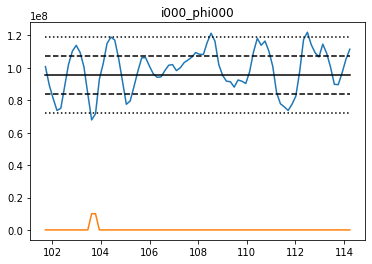

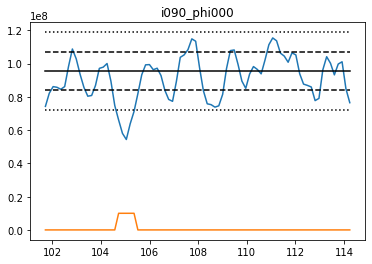

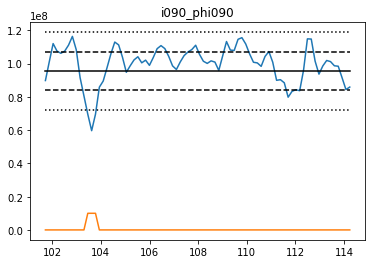

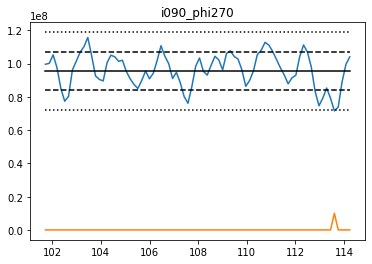

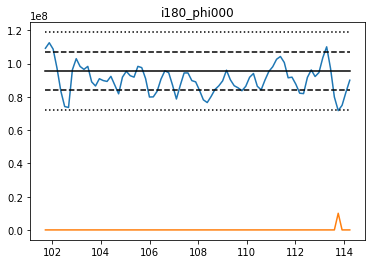

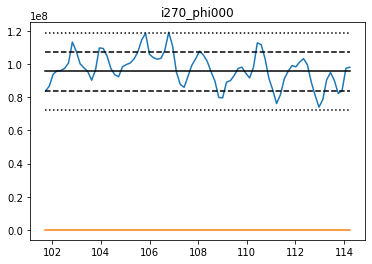

In [2]:
# Compute and plot Flux density-difference to mean SED
# Of dust obscuration of star at 2um
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
import os

wavelength = 2
Nsigma = 2

# Set path settings
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
path = '../r3dresults/st28gm06n075_nospikes/'
modelabbreviation = '075'


# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
# And load corresponding time
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Load average SED-data
average_seds = np.loadtxt(f'{path}average_sed.dat')
wavelengths = average_seds[:,0]

# Extract index of chosen wavelength
n2micron = np.argwhere(wavelengths >= wavelength)[0][0] - 1

# Loop through phases and extract flux density of wavelength
F2um = np.zeros(len(phases))
dustevents = np.zeros((len(angles),len(phases)))

# Print output header
print(f'Total included time: {snapshot_times[-1]-snapshot_times[0]}')
print('Angles      : Event time ratio     Periodicity')

for nangle,angle in enumerate(angles):
    # Reset single-angle event list
    F2dustevent = []

    for nphase,phase in enumerate(phases):
        wavetemp, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        F2um[nphase] = spectrum[n2micron]

        # Extract when F2 goes below Faverage-Nsigma for all snapshots
        if spectrum[n2micron] < average_seds[n2micron,1] - Nsigma*average_seds[n2micron,2]:
            F2dustevent.append(1)
        else:
            F2dustevent.append(0)

    # Save dustevents for each LOS
    dustevents[nangle,:] = np.array(F2dustevent)

    # Extract ratio of included time being during dust event
    event_ratio = len(np.where(dustevents[nangle] == 1)[0]) / len(phases)

    # plots
    plt.figure(num=nangle)
    plt.plot(snapshot_times,F2um)
    # Plot average
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n2micron,1],average_seds[n2micron,1]],
        'k'
    )
    # Plot 1std
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n2micron,1]+average_seds[n2micron,2],average_seds[n2micron,1]+average_seds[n2micron,2]],
        'k--'
    )
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n2micron,1]-average_seds[n2micron,2],average_seds[n2micron,1]-average_seds[n2micron,2]],
        'k--'
    )
    # Plot 2std
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n2micron,1]+2*average_seds[n2micron,2],average_seds[n2micron,1]+2*average_seds[n2micron,2]],
        'k:'
    )
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n2micron,1]-2*average_seds[n2micron,2],average_seds[n2micron,1]-2*average_seds[n2micron,2]],
        'k:'
    )
    plt.plot(snapshot_times,dustevents[nangle]*1e7)
    plt.title(angle)

    # Check if there are events:
    if np.sum(dustevents[nangle]) != 0:
        # Extract periodicity of dustevents
        periods = a3d.compute_period(
            signal=dustevents[nangle],
            timeaxis=snapshot_times
        )
        # Print output
        print(f'{angle} : {event_ratio}  {periods}')
    else:
        # Print output
        print(f'{angle} : N/A')

### Dustmass(time)-plots

052 timelength: 34.856945436820816 yrs
052 timelength: 2.598811254611197e-08
052 timelength: 1.7875241470305118e-08


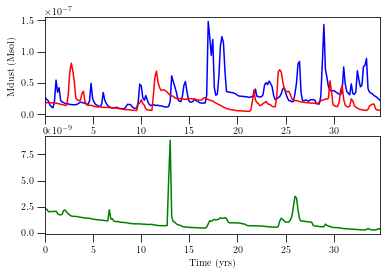

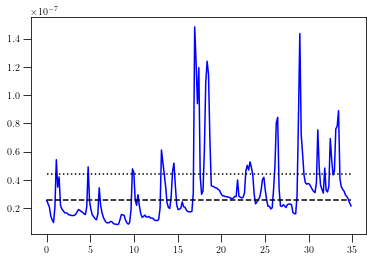

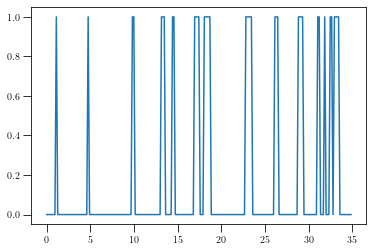

In [ ]:
# Load and plot dust mass vs time
import numpy as np
import matplotlib.pyplot as plt
import analyze_timedep_functions as atf

# Load data from *052 model
path052 = '../r3dresults/st28gm06n052_timedep_nospikes/'
phasetimes052 = np.loadtxt(path052+'snapshot_yr.dat')[:,1]
dustmass052 = np.loadtxt(path052+'dustmass.dat')[:,1]
time052 = phasetimes052 - phasetimes052[0]
# Statistics
totaltime052 = phasetimes052[-1]-phasetimes052[0] # Total time length in yrs


# Load data from *074 model
path074 = '../r3dresults/st28gm06n074_nospikes/'
phasetimes074 = np.loadtxt(path074+'snapshot_yr.dat')[:,1]
dustmass074 = np.loadtxt(path074+'dustmass.dat')[:,1]
time074 = phasetimes074 - phasetimes074[0]
# Statistics
totaltime074 = phasetimes074[-1]-phasetimes074[0] # Total time length in yrs
meanmass074 = np.mean(dustmass074)
maxmass074 = np.max(dustmass074)


# Load data from *075 model
path075 = '../r3dresults/st28gm06n075_nospikes/'
phasetimes075 = np.loadtxt(path075+'snapshot_yr.dat')[:,1]
dustmass075 = np.loadtxt(path075+'dustmass.dat')[:,1]
time075 = phasetimes075 - phasetimes075[0]
# Statistics
totaltime075 = phasetimes075[-1]-phasetimes075[0] # Total time length in yrs
meanmass075 = np.mean(dustmass075)
maxmass075 = np.max(dustmass075)



# Iniatiate figure object
fig,ax = plt.subplots(2,1)


# Plot both dust masses on top of eachother
ax[0].plot(time052,dustmass052,'b')
ax[0].plot(time074,dustmass074,'r')
ax[1].plot(time075,dustmass075,'g')

ax[0].set_ylabel('Mdust (Msol)')
ax[1].set_xlabel('Time (yrs)')
ax[0].set_xlim([time052[0],time052[-1]])
ax[1].set_xlim([time052[0],time052[-1]])

# Save figure for reference later
fig.tight_layout()
fig.savefig('../r3dplots/052_074_075_dustmasscompare.pdf', dpi=300)



#
# Extract occurance of events and plot to check
#
print('052')
atf.extract_events(
    eventdata = dustmass052,
    timerange = phasetimes052,
)
print('074')
atf.extract_events(
    eventdata = dustmass074,
    timerange = phasetimes074,
)
print('075')
atf.extract_events(
    eventdata = dustmass075,
    timerange = phasetimes075,
)

#
# Show figs
fig.show()


"""
# NOTE OLD
# Extract periodicity
dustprodperiod052 = a3d.compute_period(
    signal=dustmass052,
    timeaxis=time052,
)
print(f'052: {dustprodperiod052} yrs')
dustprodperiod074 = a3d.compute_period(
    signal=dustmass074,
    timeaxis=time074,
)
print(f'074: {dustprodperiod074} yrs')
dustprodperiod075 = a3d.compute_period(
    signal=dustmass075,
    timeaxis=time075,
)
print(f'075: {dustprodperiod075} yrs')
""";


In [11]:
dustevents052

[]

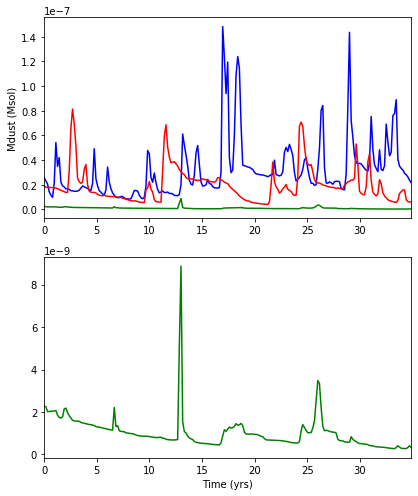

In [7]:
# Load and plot dust mass vs time
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d

# Load data from *052 model
path052 = '../r3dresults/st28gm06n052_timedep_nospikes/'
phasetimes052 = np.loadtxt(path052+'snapshot_yr.dat')[:,1]
dustmass052 = np.loadtxt(path052+'dustmass.dat')[:,1]
time052 = phasetimes052 - phasetimes052[0]

# Load data from *074 model
path074 = '../r3dresults/st28gm06n074_nospikes/'
phasetimes074 = np.loadtxt(path074+'snapshot_yr.dat')[:,1]
dustmass074 = np.loadtxt(path074+'dustmass.dat')[:,1]
time074 = phasetimes074 - phasetimes074[0]

# Load data from *075 model
path075 = '../r3dresults/st28gm06n075_nospikes/'
phasetimes075 = np.loadtxt(path075+'snapshot_yr.dat')[:,1]
dustmass075 = np.loadtxt(path075+'dustmass.dat')[:,1]
time075 = phasetimes075 - phasetimes075[0]

# Iniatiate figure object
fig,ax = plt.subplots(2,1, figsize=(6,7))


# Plot both dust masses on top of eachother
ax[0].plot(time052,dustmass052,'b')
ax[0].plot(time074,dustmass074,'r')
ax[0].plot(time075,dustmass075,'g')
ax[1].plot(time075,dustmass075,'g')

ax[0].set_ylabel('Mdust (Msol)')
ax[1].set_xlabel('Time (yrs)')
ax[0].set_xlim([time052[0],time052[-1]])
ax[1].set_xlim([time052[0],time052[-1]])


# Save figure
fig.tight_layout()

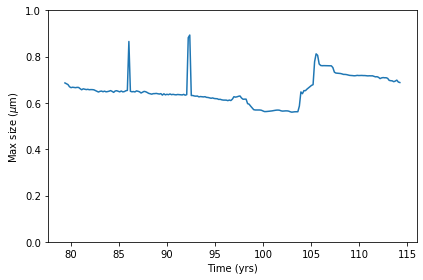

In [3]:
# Plot 075's max grain size bin vs time
import numpy as np
import matplotlib.pyplot as plt

# Load data from *075 model
path075 = '../r3dresults/st28gm06n075_nospikes/'
phasetimes075 = np.loadtxt(path075+'snapshot_yr.dat')[:,1]
grainsize075 = np.loadtxt(path075+'maxgrainsize.dat')[:,1]

plt.plot(phasetimes075,grainsize075)
plt.xlabel('Time (yrs)')
plt.ylabel(r'Max size ($\mu$m)')
plt.ylim([0,1])
plt.tight_layout()
plt.savefig('../r3dplots/075_maxgrainsize.pdf', dpi=300)


### Lum(time)-plots

In [4]:
# Extract luminosity of all spectra in Lsol
import os
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
from matplotlib import rc

Lsol = 3.828e26 # Watt

#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
path = '../r3dresults/st28gm06n052_timedep_nodust/'
#path = '../r3dresults/st28gm06n074_nospikes/'
#path = '../r3dresults/st28gm06n074_nodust/'
#path = '../r3dresults/st28gm06n075_nospikes/'
#path = '../r3dresults/st28gm06n075_nodust/'

phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Start printing output stuff in dat-file
with open(f'{path}luminosity.dat', 'w') as flum:
    flum.write(f'# Number of phases: {Nphases}\n')
    flum.write(f'#  Phase  {angles[0]}  {angles[1]}  {angles[2]}  {angles[3]}  {angles[4]}  {angles[5]}  Average\n')

    # Loop through time
    for phase in phases:

        # Declare an LOS-average luminosity
        lumaverage = 0
        # and a lift for lums in direction
        luminosities = []

        # Loop through angles
        for angle in angles:
            luminosity = a3d.compute_sed_luminosity(
                path = f'{path}{phase}/spectrum_{angle}.out'
            )/Lsol
            lumaverage += luminosity
            luminosities.append(luminosity)

        lumaverage /= 6            
        flum.write(f'   {phase}    {luminosities[0]:.3f}     {luminosities[1]:.3f}     {luminosities[2]:.3f}     {luminosities[3]:.3f}     {luminosities[4]:.3f}     {luminosities[5]:.3f}     {lumaverage:.3f}\n')

print('  Writing Lums: Done')


  Writing Lums: Done


Periods: [1.21471294 1.30147815 6.07356469 4.55517352] yrs


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:2796: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep


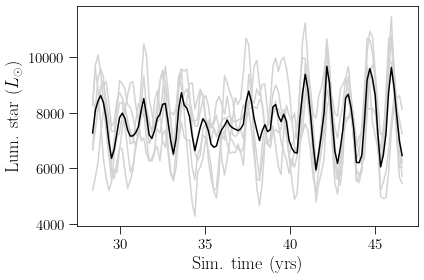

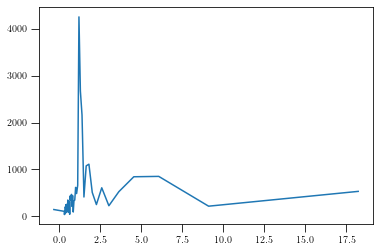

In [14]:
# Plot all luminosities vs time
import numpy as np
import os
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
from matplotlib import rc


# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Set paths and model name
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
path = '../r3dresults/st28gm06n052_timedep_nodust/'
modelabbreviation = '052_nodust'

#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
#path = '../r3dresults/st28gm06n074_nodust/'
#modelabbreviation = '074_nodust'

#path = '../r3dresults/st28gm06n075_nospikes/'
#modelabbreviation = '075'
#path = '../r3dresults/st28gm06n075_nodust/'
#modelabbreviation = '075_nodust'


# Extract phases, times, lums
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:,1]
luminosities = np.loadtxt(path+'luminosity.dat')
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Nangles = len(angles)

# Plot all angles as grey and average as black ontop
fig, ax = plt.figure(num=1, figsize=(6, 4)), plt.axes()

for nangle in range(Nangles):
    ax.plot(phasetimes,luminosities[:,nangle+1],color='lightgrey')

# Average is the last column
ax.plot(phasetimes,luminosities[:,-1],'-',color='black')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);

# Change ylabel according to dust or not
if len(modelabbreviation) > 3:
    ax.set_ylabel(r'Lum. star ($L_\odot$)',fontsize=18);
else:
    ax.set_ylabel(r'Lum. star and dust ($L_\odot$)',fontsize=18);

ax.tick_params(
    axis='both', 
    which='major', 
    labelsize=15
)
ax.grid(
    visible=False,
    which='both',
    axis='x'
)

fig.tight_layout()
fig.savefig(
    f'/home/joachim/exwings/r3dplots/{modelabbreviation}_lum_vs_time.pdf',
    dpi=300,
    facecolor='white'
)

# Extract periodicity of the highest numbers of the fft
periods = a3d.compute_period(
    signal = luminosities[:,-1],
    timeaxis = phasetimes,
    plot_spec='y'
)
print(f'Periods: {periods} yrs')



### SED-based plots

Total included time: 18.220694067254854
Angle          Time ratio            Periods
i000_phi000 :  0.10344827586206896   [18.22069407  9.11034703  6.07356469  3.64413881]
i090_phi000 :  0.19827586206896552   [18.22069407  9.11034703  6.07356469  2.6029563 ]
i090_phi090 :  0.3620689655172414   [18.22069407  4.55517352  9.11034703  3.64413881]
i090_phi270 : N/A
i180_phi000 :  0.08620689655172414   [18.22069407  9.11034703  6.07356469  2.6029563 ]
i270_phi000 :  0.2413793103448276   [9.11034703 4.55517352 3.03678234 6.07356469]


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:2796: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep


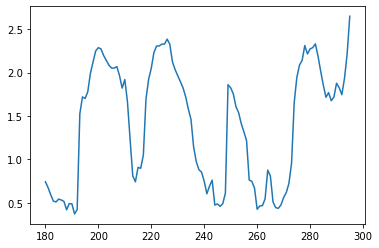

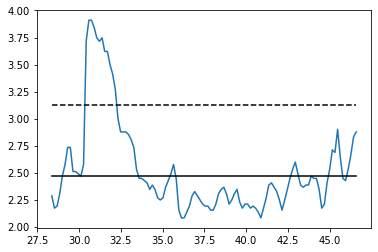

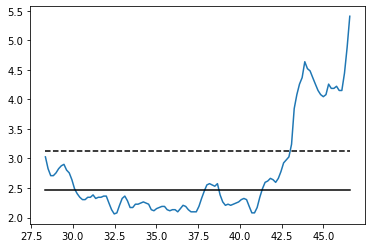

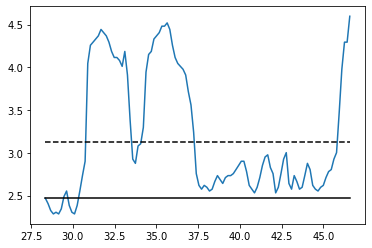

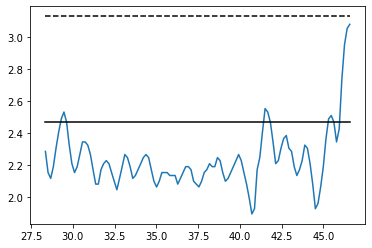

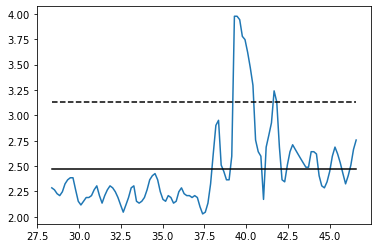

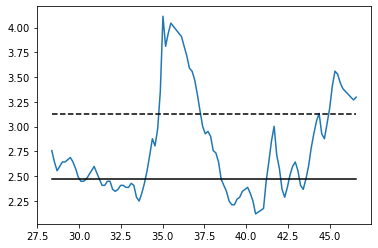

In [1]:
# Extract and plot lambda_peak(time)
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import numpy as np
import os

# TODO
# add real time x-axis to these
#
# compare with F2-plots and with F10-plots, or results on obscurations

# Set path settings
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
#path = '../r3dresults/st28gm06n075_nospikes/'
#modelabbreviation = '075'

# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()

# And load corresponding time
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Extract lambdapeak of average SED (and difference between that and std's max)
average_sed = np.loadtxt(f'{path}average_sed.dat')
lambda_peak_average = average_sed[np.argmax(average_sed[:,1]),0]
lambda_peak_std = np.abs(
    average_sed[np.argmax(average_sed[:,1]),0] - average_sed[np.argmax(average_sed[:,1]+average_sed[:,2]),0]
)
# Extract all lambda_peaks
lambda_peak = np.zeros((len(phases),len(angles)))
for nphase,phase in enumerate(phases):
    for nangle,angle in enumerate(angles):
        wavelength, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        maxindex = np.argmax(spectrum)
        lambda_peak[nphase,nangle] = wavelength[maxindex]

# Save max-changes of lambdapeak
minmax = np.zeros(len(phases))
for nphase,phase in enumerate(phases):
    minmax[nphase] = np.max(lambda_peak[nphase,:]) - np.min(lambda_peak[nphase,:])
plt.figure(num='max differnce (due to angle) in lambda')
plt.plot(phases,minmax)



print(f'Total included time: {snapshot_times[-1] - snapshot_times[0]}')
print('Angle          Time ratio            Periods')
for nangle,angle in enumerate(angles):

    # Take out FFT of each direction of when curve is more than 1sigma from
    # average lambdapeak
    lambda_peak_major = np.zeros(len(phases))
    event_index = np.argwhere(lambda_peak[:,nangle] > lambda_peak_average+3*lambda_peak_std)
    lambda_peak_major[event_index] = lambda_peak[event_index,nangle]

    periods = a3d.compute_period(
        signal=lambda_peak_major,
        timeaxis=snapshot_times
    )
    if np.sum(lambda_peak_major) != 0:
        event_ratio = len(event_index)/len(phases)
        print(f'{angle} :  {event_ratio}   {periods}')
    else:
        print(f'{angle} : N/A')

    # And plot lambdapeak(um) vs time directly, one plot per angle
    plt.figure(num=f'lambdapeak variations {angle}')
    plt.plot(snapshot_times,lambda_peak[:,nangle])
    # Plot average and average plus std-based lambdapeak
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [lambda_peak_average,lambda_peak_average],'k'
    )
    # Dashed line for 3x lambdapeak-std-based value
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [lambda_peak_average+3*lambda_peak_std,lambda_peak_average+3*lambda_peak_std],'k--'
    )


### Extract main source size

In [1]:
# Extract and save time-angle-dependent source-size at various lambda
import analyze_timedep_functions as atf
import numpy as np
import os

# Template size of all stars
Rstar = 1.65
# Chose model
models = [
    #'st28gm06n052_timedep_nospikes',
    'st28gm06n052_timedep_nodust',
    #'st28gm06n074_nospikes',
    'st28gm06n074_nodust',
    #'st28gm06n075_nospikes',
    'st28gm06n075_nodust'
]
# Chose wavelength (in um)
wavelengths = [
    '01',
    '02',
    '10',
]
# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
for modelname in models:
    for wavelength in wavelengths:

        # Extract list of folders from the path folder, and make them to numbers, and sort them!
        path = f'../r3dresults/{modelname}/'
        phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
        phases.sort()

        # Run extractor and save data
        atf.extract_sourcesize(
            path=path,
            phases=phases,
            angles=angles,
            wavelength=wavelength,
            save_datafile='y'
        )
        # Load and check the time-average size of the time-depdendant LOS-averaged size
        average_radii = np.loadtxt(f'../r3dresults/{modelname}/source_radius_{wavelength}um.dat')[:,1]
        average_radius = np.mean(average_radii)
        print(
            f'{modelname} radius at {wavelength} um: {average_radius} au. Ratio: {average_radius/Rstar}'
        )
        os.system(
            'spd-say moo'
        )
        # Empty line
        print(
            ''
        )





extract_sourcesize: Done
  Output written to ../r3dresults/st28gm06n052_timedep_nodust/source_radius_01um.dat
st28gm06n052_timedep_nodust radius at 01 um: 1.6423338009049773 au. Ratio: 0.9953538187302893

extract_sourcesize: Done
  Output written to ../r3dresults/st28gm06n052_timedep_nodust/source_radius_02um.dat
st28gm06n052_timedep_nodust radius at 02 um: 1.6555142986425337 au. Ratio: 1.0033419991772932

extract_sourcesize: Done
  Output written to ../r3dresults/st28gm06n052_timedep_nodust/source_radius_10um.dat
st28gm06n052_timedep_nodust radius at 10 um: 1.6597647963800903 au. Ratio: 1.005918058412176

extract_sourcesize: Done
  Output written to ../r3dresults/st28gm06n074_nodust/source_radius_01um.dat
st28gm06n074_nodust radius at 01 um: 1.6444150678733034 au. Ratio: 0.9966151926504869

extract_sourcesize: Done
  Output written to ../r3dresults/st28gm06n074_nodust/source_radius_02um.dat
st28gm06n074_nodust radius at 02 um: 1.6575031221719456 au. Ratio: 1.004547346770876

extract_s

In [ ]:
# Print average flux density of nodust-data at each wavelength
# - to use to define fluxlimit in size-extractor
import numpy as np

paths = [
    '../r3dresults/st28gm06n052_timedep_nodust/average_sed.dat',
    '../r3dresults/st28gm06n074_nodust/average_sed.dat',
    '../r3dresults/st28gm06n075_nodust/average_sed.dat',
]
average_onemicron = 0
average_twomicron = 0
average_tenmicron = 0

for path in paths:

    wavelengths = np.loadtxt(path)[:,0]
    average_sed = np.loadtxt(path)[:,1]

    onemicron = np.where(wavelengths >= 1 )[0][0]
    twomicron = np.where(wavelengths >= 2 )[0][0]
    tenmicron = np.where(wavelengths >= 10)[0][0]

    average_onemicron += average_sed[onemicron]
    average_twomicron += average_sed[twomicron]
    average_tenmicron += average_sed[tenmicron]

    print(path.split('/')[-2])
    print(f'{wavelengths[onemicron]} um: {average_sed[onemicron]} Jy')
    print(f'{wavelengths[twomicron]} um: {average_sed[twomicron]} Jy')
    print(f'{wavelengths[tenmicron]} um: {average_sed[tenmicron]} Jy')
    print('')

average_onemicron /= len(paths)
average_twomicron /= len(paths)
average_tenmicron /= len(paths)

print('average_nodust')
print(f'{wavelengths[onemicron]} um: {average_onemicron} Jy')
print(f'{wavelengths[twomicron]} um: {average_twomicron} Jy')
print(f'{wavelengths[tenmicron]} um: {average_tenmicron} Jy')




st28gm06n052_timedep_nodust
1.00791589806 um: 42451806.19613231 Jy
2.010669926771 um: 97223628.13918304 Jy
10.07270043879 um: 20496420.35404154 Jy

st28gm06n074_nodust
1.00791589806 um: 42405880.05171331 Jy
2.010669926771 um: 97418618.79073843 Jy
10.07270043879 um: 20609549.741299596 Jy

st28gm06n075_nodust
1.00791589806 um: 42223897.16277945 Jy
2.010669926771 um: 97123325.49826032 Jy
10.07270043879 um: 20537622.784469306 Jy

average_nodust
1.00791589806 um: 42360527.80354169 Jy
2.010669926771 um: 97255190.80939393 Jy
10.07270043879 um: 20547864.293270145 Jy


In [2]:
# Load and check the "correctedness" of average of average radii of each model
import numpy as np

# Template size of all stars
Rstar = 1.65
# Chose model
models = [
    #'st28gm06n052_timedep_nospikes',
    'st28gm06n052_timedep_nodust',
    #'st28gm06n074_nospikes',
    #'st28gm06n074_nodust',
    #'st28gm06n075_nospikes',
    #'st28gm06n075_nodust'
]
# Chose wavelength (in um)
wavelengths = [
    '01',
    '02',
    '10'
]
for modelname in models:
    for wavelength in wavelengths:
        average_radii = np.loadtxt(f'../r3dresults/{modelname}/source_radius_{wavelength}um.dat')[:,1]
        average_radius = np.mean(average_radii)
        print(f'{modelname} radius at {wavelength} um: {average_radius} au. Ratio: {average_radius/Rstar}')





st28gm06n052_timedep_nodust radius at 01 um: 1.6480172398190045 au. Ratio: 0.9987983271630331
st28gm06n052_timedep_nodust radius at 02 um: 2.171525746606335 au. Ratio: 1.3160762100644454
st28gm06n052_timedep_nodust radius at 10 um: 2.712939411764706 au. Ratio: 1.644205704099822


052_nodust at 01um: r3d-radius / co5bold-radius = 0.9954
052_nodust at 02um: r3d-radius / co5bold-radius = 1.0033
052_nodust at 10um: r3d-radius / co5bold-radius = 1.0059
074_nodust at 01um: r3d-radius / co5bold-radius = 0.9966
074_nodust at 02um: r3d-radius / co5bold-radius = 1.0045
074_nodust at 10um: r3d-radius / co5bold-radius = 1.0075
075_nodust at 01um: r3d-radius / co5bold-radius = 0.9951
075_nodust at 02um: r3d-radius / co5bold-radius = 1.0029
075_nodust at 10um: r3d-radius / co5bold-radius = 1.0058


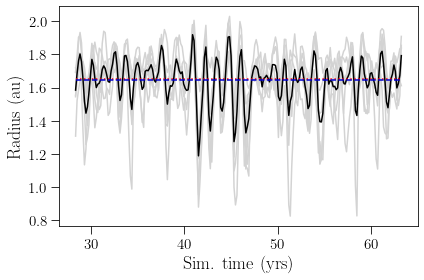

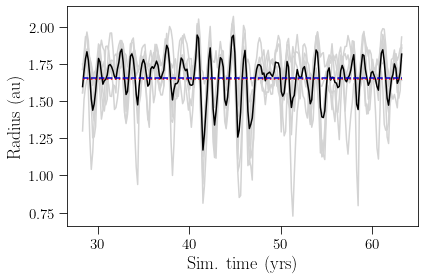

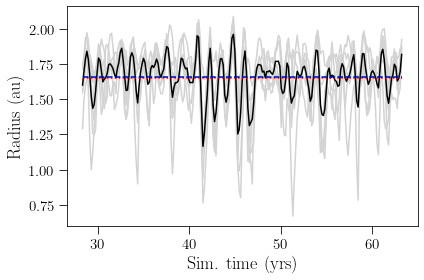

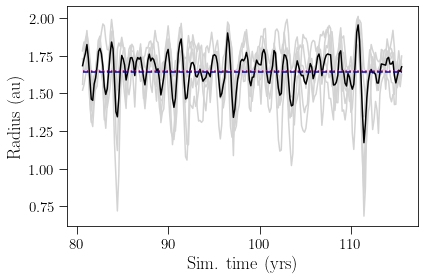

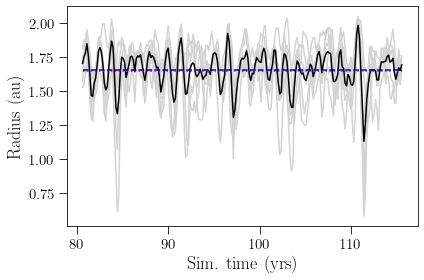

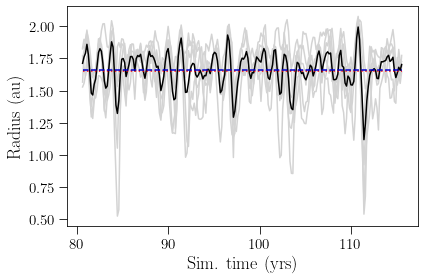

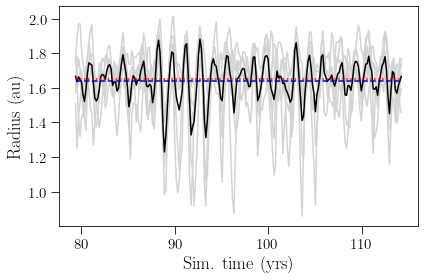

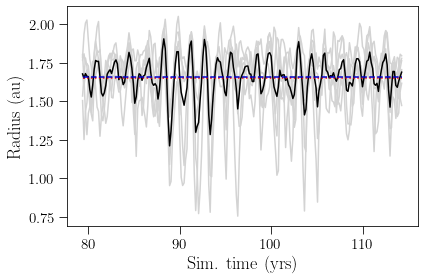

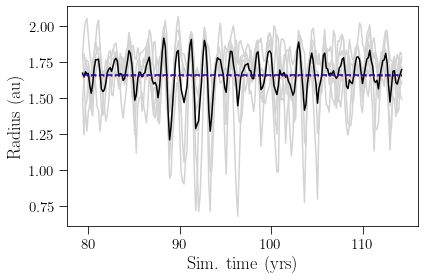

In [2]:
# Plot data on source radii as saved in cell above.
import matplotlib.pyplot as plt
import numpy as np
# Figure settings
from matplotlib import rc
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Chose model
models = [
    #'st28gm06n052_timedep_nospikes',
    'st28gm06n052_timedep_nodust',
    #'st28gm06n074_nospikes',
    'st28gm06n074_nodust',
    #'st28gm06n075_nospikes',
    'st28gm06n075_nodust'
]
modelnumbs = [
    #'052',
    '052_nodust',
    #'074',
    '074_nodust',
    #'075',
    '075_nodust',
]
# Chose wavelength (in um)
wavelengths = [
    '01',
    '02',
    '10'
]
# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Plot all
for modelname,modelnumb in zip(models,modelnumbs):
    for wavelength in wavelengths:
        
        path = f'../r3dresults/{modelname}/'

        # Load and plot radii vs time
        source_radii = np.loadtxt(f'{path}/source_radius_{wavelength}um.dat')

        # Load corresponding time
        snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

        # Set figure object
        fig, ax = plt.figure(figsize=(6, 4)), plt.axes()
        ax.set_ylabel(r'Radius (au)', fontsize=18)
        ax.set_xlabel(r'Sim. time (yrs)',fontsize=18)
        ax.tick_params(axis='both', which='major', labelsize=15)

        # First plot angles
        for nangle in range(len(angles)):
            ax.plot(snapshot_times,source_radii[:,nangle+2],'lightgrey')
        # Then angle-averaged
        ax.plot(snapshot_times,source_radii[:,1],'k')

        # Plot "table radius" and average radius
        Rstar = 1.65
        source_radii_average = np.mean(source_radii[:,1])
        ax.plot(
            [snapshot_times[0],snapshot_times[-1]],
            [Rstar,Rstar],'r:'
        )
        ax.plot(
            [snapshot_times[0],snapshot_times[-1]],
            [source_radii_average,source_radii_average],'--',color='mediumblue'
        )
        ax.grid(
            visible=False,
            which='both',
            axis='x'
        )
        fig.tight_layout()
        # Save figure
        fig.savefig(f'../r3dplots/{modelnumb}_sourceradius_{wavelength}um.pdf', dpi=300, facecolor="white")

        # Print some interesting output
        print(f'{modelnumb} at {wavelength}um: r3d-radius / co5bold-radius = {source_radii_average/Rstar:.4f}')

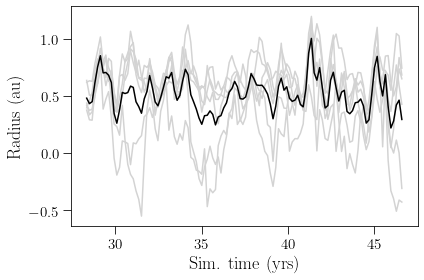

In [11]:
# FOR PAPER
# Plot Rsource minus Rstar for 2um -> negative values : obscured star, positive: enlarged
import matplotlib.pyplot as plt
import numpy as np
# Figure settings
from matplotlib import rc
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Chose model
models = [
    'st28gm06n052_timedep_nospikes',
    #'st28gm06n052_timedep_nodust',
    #'st28gm06n074_nospikes',
    #'st28gm06n074_nodust',
    #'st28gm06n075_nospikes',
    #'st28gm06n075_nodust'
]
modelnumbs = [
    '052',
    #'052_nodust',
    #'074',
    #'074_nodust',
    #'075',
    #'075_nodust',
]
# Chose wavelength (in um)
wavelength = '02'

# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]

# TODO
# städa den här koden!

# Plot all
for modelname,modelnumb in zip(models,modelnumbs):
    
    path = f'../r3dresults/{modelname}/'

    # Load source radius
    source_radii = np.loadtxt(f'{path}/source_radius_{wavelength}um.dat')

    # Load star radius
    star_radii = np.loadtxt(f'../r3dresults/st28gm06n{modelnumb}_timedep_nodust/source_radius_01um.dat')

    # Load corresponding time
    snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

    # Declare difference-array
    source_diff = np.zeros((len(snapshot_times),len(angles)))

    # Set figure object
    fig, ax = plt.figure(figsize=(6, 4)), plt.axes()
    ax.set_ylabel(r'Radius (au)', fontsize=18)
    ax.set_xlabel(r'Sim. time (yrs)',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Subtract sizes
    for nangle in range(len(angles)):
        source_diff[:,nangle] = source_radii[:,nangle+2] - star_radii[:,nangle+2] 

        # and plot
        ax.plot(snapshot_times,source_diff[:,nangle],'lightgrey')
    
    # Then angle-averaged
    source_diff_average = np.zeros(len(snapshot_times))
    for nphase in range(len(snapshot_times)):
        source_diff_average[nphase] = np.mean(source_diff[nphase,:])

    
    ax.plot(snapshot_times,source_diff_average,'k')

    #ax.grid(
    #    visible=False,
    #    which='both',
    #    axis='x'
    #)
    fig.tight_layout()
    # Save figure
    #fig.savefig(f'../r3dplots/{modelnumb}_radiusdiff_{wavelength}um.pdf', dpi=300, facecolor="white")





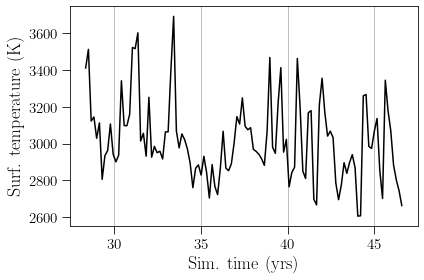

In [3]:
# Plot average temperature of spherical shell around Rsource
# Extract with atf.extract_surfacetemp()
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

path = '../r3dresults/st28gm06n052_timedep_nodust/'

# Load temperature and snapshot times
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]
surface_temperatures = np.loadtxt(path+'surface_temperature.dat')[:,1]

fig, ax = plt.figure(), plt.axes()
ax.plot(snapshot_times,surface_temperatures,'k')

ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'Surf. temperature (K)',fontsize=18);
ax.tick_params(
    axis='both', 
    which='major', 
    labelsize=15
)
ax.grid(
    visible=True,
    which='both',
    axis='x'
)

fig.tight_layout()
fig.savefig(
    f'/home/joachim/exwings/r3dplots/20241023_tillBT/052_nodust_surfacetemperature.pdf',
    dpi=300,
    facecolor='white'
)





[1.7491335  2.83316611]


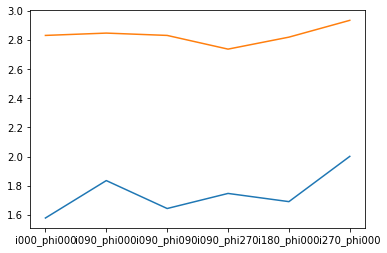

In [5]:
# Compare source size of 1um and 2um images of 052_296
import analyze_timedep_functions as atf
import numpy as np
import matplotlib.pyplot as plt

modelpath = '../r3dresults/st28gm06n052_timedep_nodust/'
phase = [
    '296'
]
wavelengths = [
    '01',
    '02'
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
stellar_radius_average = np.zeros(len(wavelengths))
stellar_radii = np.zeros((len(wavelengths),6))


for nwave,wavelength in enumerate(wavelengths):
    stellar_radius_average[nwave], stellar_radii[nwave,:] = atf.extract_sourcesize(
        path=modelpath,
        phases=phase,
        angles=angles,
        wavelength=wavelength,
        save_datafile='n'
    )
    plt.plot(angles,stellar_radii[nwave,:])




print(stellar_radius_average)








#### Measure source size events

/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:2796: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep


i000_phi000 : 0.017241379310344827  [ 6.07356469  9.11034703 18.22069407         inf]
i090_phi000 : 0.04310344827586207  [ 6.07356469  9.11034703 18.22069407         inf]
i090_phi090 : 0.1896551724137931  [ 6.07356469  9.11034703 18.22069407         inf]
i090_phi270 : N/A
i180_phi000 : 0.05172413793103448  [ 6.07356469  9.11034703 18.22069407         inf]
i270_phi000 : 0.09482758620689655  [ 6.07356469  9.11034703 18.22069407         inf]
Total included time: 18.220694067254854


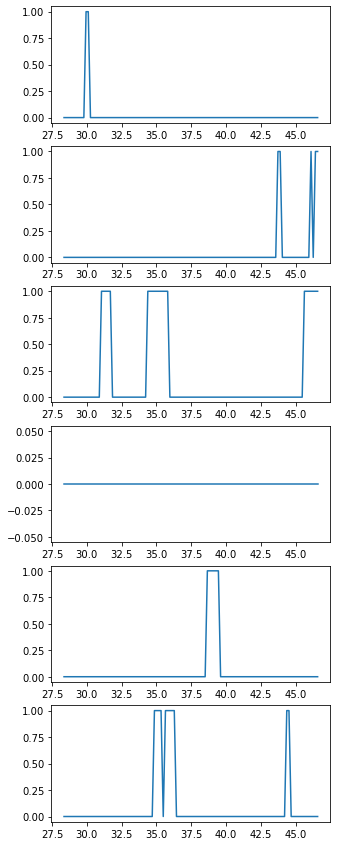

In [6]:
# With 1&2um: measure major source size reductions
# With 10um: measure major source size increase
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d

# Chose wavelength
# Chose to check events where the source is smaller (reduced) or larger (increased)
obscuration_type = 'reduced'
#wavelength = '01'
wavelength = '02'

#obscuration_type = 'increased'
#wavelength = '10'


# Set path
path_starradi = '../r3dresults/st28gm06n052_timedep_nodust/source_radius_01um.dat'
path_sourceradi = f'../r3dresults/st28gm06n052_timedep_nospikes/source_radius_{wavelength}um.dat'

# Load snapshot times
snapshot_times = np.loadtxt('../r3dresults/st28gm06n052_timedep_nodust/snapshot_yr.dat')[:,1]

# List angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]

# Load stellar data
# each column is an angle
# NOTE included temporary to only use a subset of phases from starradi
tempdata = np.loadtxt(path_starradi)
star_radii = tempdata[:,2:]
phases = tempdata[:,0]

# Save number of phases and angles, and std av angöe-averaged star-radius
Nphase = star_radii.shape[0]
Nangle = star_radii.shape[1]
std_radius = np.std(tempdata[:,1])


# Load dust+star data
tempdata = np.loadtxt(path_sourceradi)
indexincludedphases = []
for phase in phases:
    indexincludedphases.append(np.argwhere(tempdata[:,0] == phase)[0][0])
source_radii = tempdata[indexincludedphases,2:]

# Loop through all phases and angles
# check source is XX times stellar source at same phase
# and save in this array
dustevents = np.zeros(star_radii.shape)

sizelimit = 1#np.sqrt(2)

if obscuration_type == 'reduced':

    for nangle in range(Nangle):
        for nphase in range(Nphase):
            if source_radii[nphase,nangle] <= 1.65:#star_radii[nphase,nangle]/sizelimit:
                dustevents[nphase,nangle] = 1


if obscuration_type == 'increased':
    radiuslimit = 1.3

    for nangle in range(Nangle):
        for nphase in range(Nphase):
            if source_radii[nphase,nangle] >= star_radii[nphase,nangle]*sizelimit:
                dustevents[nphase,nangle] = 1


# Plot events
fig, ax = plt.subplots(
    Nangle,1, 
    figsize = (5,15),
)
for nangle,angle in enumerate(angles):
    ax[nangle].plot(snapshot_times,dustevents[:,nangle])

    # Extract periodicity of events
    # TODO
    # ta ut periodicitet och längd på obscurations!
    # plotta 1(lr2) och 10um i samma? Iallafall bredvid, eller likadan med 10 och jämför när o hur
    # eventen händer, bör vara likadana? Nja inte nörvändigtvis men många bör vara samtidigt


    # Check if there are events:
    if np.sum(dustevents[:,nangle]) != 0:
        # Extract length of events
        event_ratio = np.sum(dustevents[:,nangle])/len(phases)

        # Extract periodicity of dustevents
        periods = a3d.compute_period(
            signal=dustevents[nangle],
            timeaxis=snapshot_times
        )
        # Print output
        print(f'{angle} : {event_ratio}  {periods}')
    else:
        # Print output
        print(f'{angle} : N/A')
print(f'Total included time: {snapshot_times[-1] - snapshot_times[0]}')







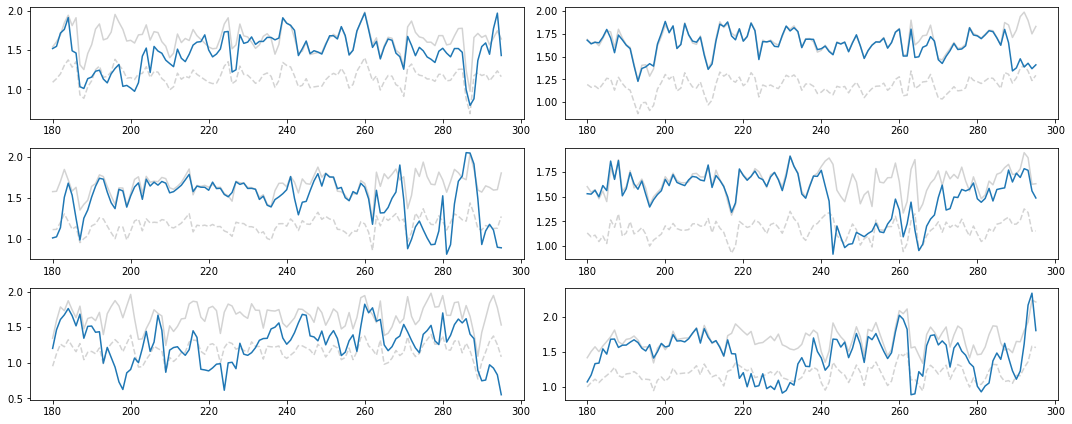

In [33]:
# Plot (For paper) difference in size between Rsource and Rstar
# Negative for obscuration
# Positive for increase

import numpy as np
import matplotlib.pyplot as plt

# Chose wavelength
# Chose to check events where the source is smaller (reduced) or larger (increased)
obscuration_type = 'reduced'
wavelength = '01'
#wavelength = '02'

#obscuration_type = 'increased'
#wavelength = '10'


# Set path
path_starradi = '../r3dresults/st28gm06n052_timedep_nodust/source_radius_01um.dat'
path_sourceradi = f'../r3dresults/st28gm06n052_timedep_nospikes/source_radius_{wavelength}um.dat'

# Load snapshot-times

# TODO


# Load stellar data
# each column is an angle
# NOTE included temporary to only use a subset of phases from starradi
tempdata = np.loadtxt(path_starradi)
star_radii = tempdata[:,2:]
phases = tempdata[:,0]

# Save number of phases and angles
Nphase = star_radii.shape[0]
Nangle = star_radii.shape[1]


# Load dust+star data
tempdata = np.loadtxt(path_sourceradi)
indexincludedphases = []
for phase in phases:
    # Extract phases from Rsource that exist in nodust NOTE temporary
    indexincludedphases.append(np.argwhere(tempdata[:,0] == phase)[0][0])
source_radii = tempdata[indexincludedphases,2:]

# Loop through all phases and angles
# Save difference in radius in this array
diff_radii = np.zeros(star_radii.shape)
half_star_radii = np.zeros(star_radii.shape)
sizelimit = np.sqrt(2)

for nangle in range(Nangle):
    for nphase in range(Nphase):
        diff_radii[nphase,nangle] = source_radii[nphase,nangle]
        if obscuration_type == 'reduced':
            half_star_radii[nphase,nangle] = star_radii[nphase,nangle]/sizelimit
        if obscuration_type == 'increased':
            half_star_radii[nphase,nangle] = star_radii[nphase,nangle]*sizelimit





fig, ax = plt.subplots(
    int(Nangle/2),2, 
    figsize = (15,6),
)

for nangle in range(Nangle):
    if nangle < 3:
        imind1 = nangle
        imind2 = 0
    else:
        imind1 = nangle-3
        imind2 = 1

    ax[imind1][imind2].plot(phases,star_radii[:,nangle],'lightgrey')
    ax[imind1][imind2].plot(phases,half_star_radii[:,nangle],linestyle='--',color='lightgrey')
    ax[imind1][imind2].plot(phases,diff_radii[:,nangle])

fig.tight_layout()    



In [26]:
for nangle in range(Nangle):
    if nangle < 3:
        imindex = [nangle,0]
    else:
        imindex = [nangle-3,1]

    print(imindex)



[0, 0]
[1, 0]
[2, 0]
[0, 1]
[1, 1]
[2, 1]


# Compare with large sphere

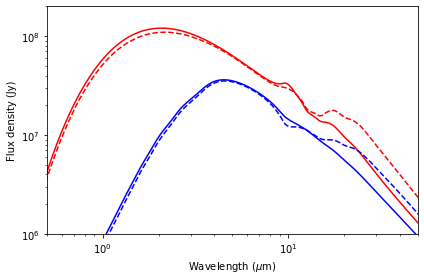

In [9]:
# Plot SEDs of each preliminary variant
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

# No extinction
wavelength, sednormal = a3d.load_spectrum(
    path = '../r3dresults/st28gm06n052_largesphere/199_i090_phi270/spectrum_i090_phi270.out'
)
wavelength, sedlarge = a3d.load_spectrum(
    path = '../r3dresults/st28gm06n052_largesphere/199_i090_phi270/spectrum_199_largesphere.out'
)
plt.plot(wavelength,sednormal,'r-')
plt.plot(wavelength,sedlarge,'r--')
# Utan kraftig extinction från början blir det inte stor skillnad på
# korta våglängder men på längre så ser jag att 10um-featuren blir
# svagare medans på >20um är det maffig stoftemission

# With extinction
wavelength, sednormal = a3d.load_spectrum(
    path = '../r3dresults/st28gm06n052_largesphere/225_i090_phi090/spectrum_i090_phi090.out'
)
wavelength, sedlarge = a3d.load_spectrum(
    path = '../r3dresults/st28gm06n052_largesphere/225_i090_phi090/spectrum_225_largesphere.out'
)
plt.plot(wavelength,sednormal,'b-')
plt.plot(wavelength,sedlarge,'b--')
# Inte stor skillnad på korta våglängder här heller, däremot mer Si
# absorption vid 10um och kraftig emission på >20um.


plt.xscale('log')
plt.yscale('log')
plt.xlim([0.5,50])
plt.ylim([1e6,2e8])
plt.ylabel('Flux density (Jy)')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.tight_layout()
plt.savefig('../r3dresults/st28gm06n052_largesphere/compare_sed.pdf', dpi=300)
